# Use Case and Data Set

### Because the data I use contains approximately 7000 files, local files and jupyter notebook (instead of watson studio) are used for this assignment for convenience.
### Huge Stock Market Dataset from Kaggle (uploaded by Boris Marjanovic) is used for this project. The author provided the full historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT. The dataset was last updated on 11/10/2017, and it was presented in txt format.

### Two main objectives of this project: 1) Evaluate if stocks can be clustered into subgroups by machine learning, 2) Use deep learning to predict stock price.

In [365]:
# Obtain the list of files
import os

list_of_files =[]
def get_file_names(directory, file_type, filename_prefix=''):
    
        for path, subdirectories, files in os.walk(directory):
            for filename in files:
                if filename[-3:] != file_type or (not filename.startswith(filename_prefix)):
                    continue
                list_of_files.append(os.path.join(path, filename))

In [366]:
get_file_names('C:\\Users\\yanru\\Desktop\\Data\\Stocks', 'txt')
print('The number of files:',len(list_of_files))


The number of files: 7195


# Data Quality Assessment

### Get the maximum and minimum price for each stock and skip empy files.

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

min_list = []
max_list = []
time_start = []
time_end = []

for file in list_of_files:
    try:
        df = pd.read_csv(file)
    except pd.io.common.EmptyDataError:
      print(file, " is empty and has been skipped.")
    min_list.append(df.Close.min())
    max_list.append(df.Close.max())
    time_start.append(df.Date.iloc[0])
    time_end.append(df.Date.iloc[-1])

C:\Users\yanru\Desktop\Data\Stocks\accp.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\amrh.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\amrhw.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\asns.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\bbrx.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\bolt.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\boxl.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\bxg.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\ehr.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\fmax.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\gnst.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\hayu.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\jt.us.txt  is empt

# Data Exploration

### Histograms of the distributions of maximum and minimum stock price suggest a wide range of price distribution and the necessity of normalization prior to subsequent analysis.

Text(0, 0.5, 'Count')

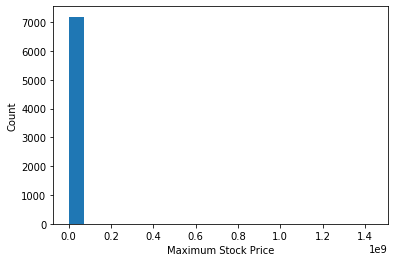

In [368]:
plt.hist(max_list, bins = 20)
plt.xlabel('Maximum Stock Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

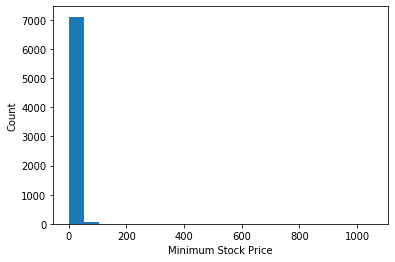

In [369]:
plt.hist(min_list, bins = 20)
plt.xlabel('Minimum Stock Price')
plt.ylabel('Count')

### Histogram of the distribution of the last recorded date of stock price showed that the majority of the stocks had the last recorded date ranging from Nov 7 - Nov 10, 2017.

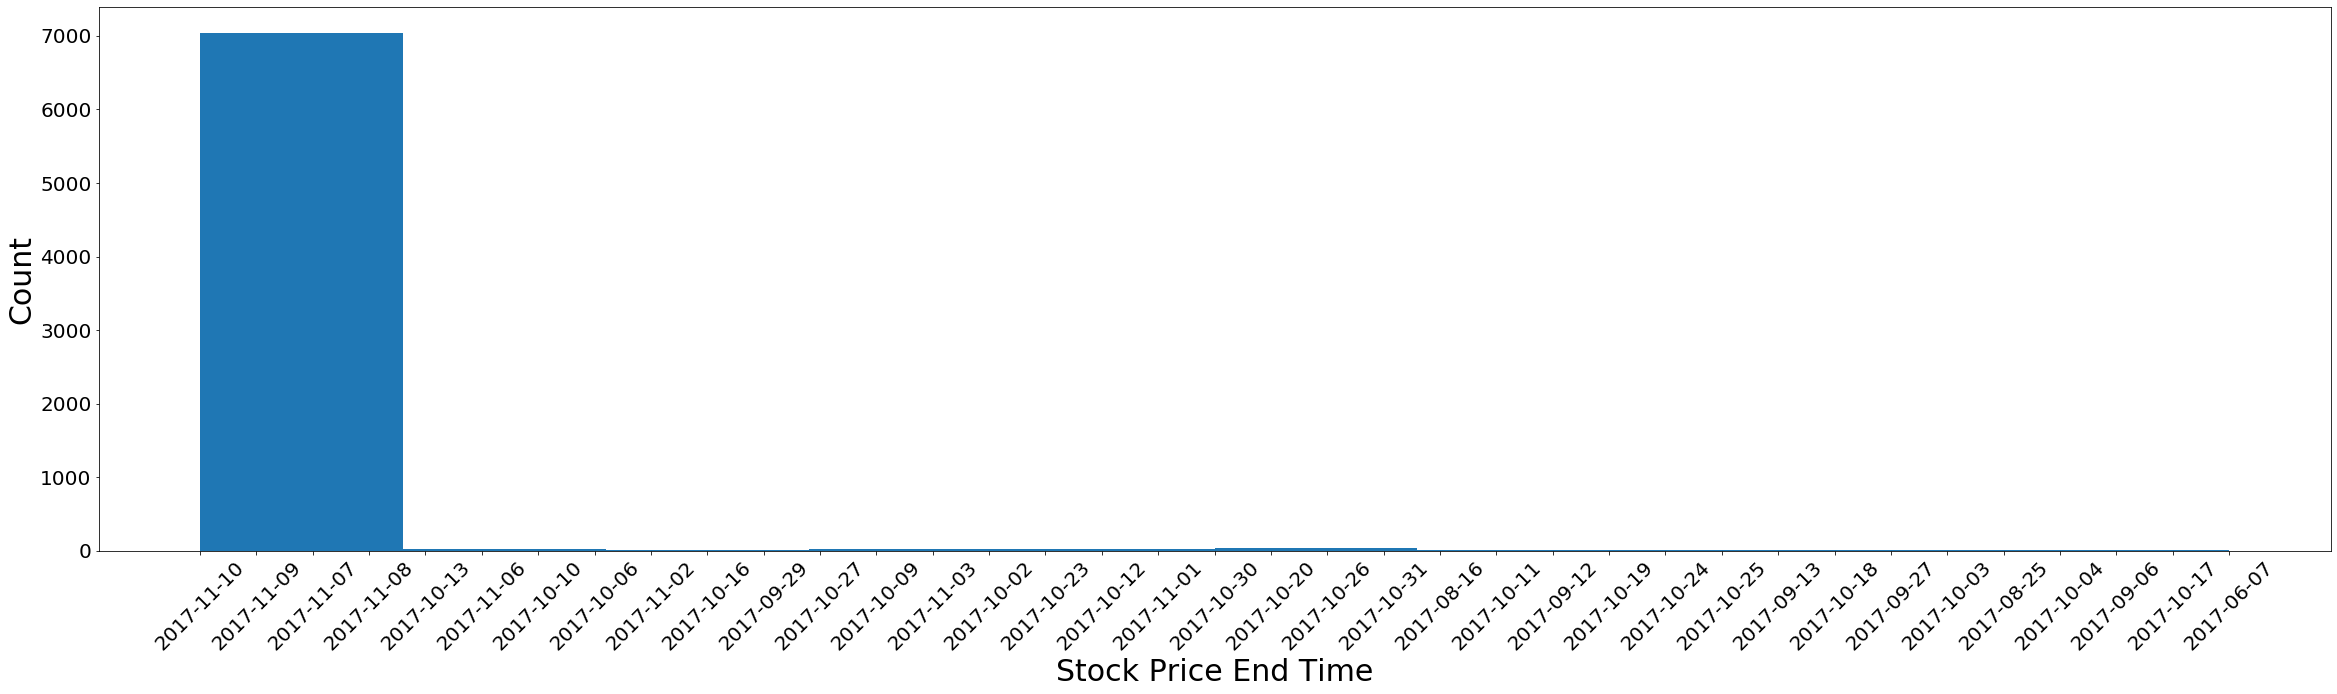

In [370]:
plt.figure(figsize=(40,10))
plt.hist(time_end)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Stock Price End Time', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.show()

### Histogram of the distribution of the first recorded date of stock price showed that the majority of the stocks had the first recorded date after 2000.

In [371]:
# Check the unique starting date of all stocks
import numpy as np
for i in np.unique(np.asarray(time_start)):
    print (i)

1962-01-02
1970-01-02
1972-01-07
1972-03-20
1977-01-03
1980-01-02
1980-03-17
1980-11-03
1981-09-22
1981-12-31
1982-01-04
1982-03-31
1982-06-02
1983-03-21
1983-04-06
1983-06-10
1983-09-01
1983-11-21
1984-07-19
1984-09-07
1984-10-03
1984-10-05
1984-10-19
1984-10-24
1984-10-26
1984-11-01
1984-12-17
1984-12-18
1984-12-31
1985-02-04
1985-04-08
1985-04-19
1985-07-01
1986-03-13
1986-05-29
1986-07-09
1986-07-16
1986-08-14
1986-09-09
1986-11-06
1986-11-12
1986-11-24
1987-03-11
1987-07-02
1987-07-23
1987-08-19
1987-09-01
1987-11-05
1987-12-30
1988-01-04
1988-01-05
1988-02-01
1988-03-02
1988-07-07
1988-09-07
1989-01-05
1989-04-12
1989-05-16
1989-06-30
1989-09-13
1989-10-04
1990-01-11
1990-01-12
1990-03-26
1990-03-27
1990-06-18
1991-02-28
1991-04-02
1991-04-12
1991-04-25
1991-05-01
1991-06-26
1991-08-06
1991-08-07
1991-09-17
1991-10-04
1991-12-16
1992-01-22
1992-02-26
1992-03-03
1992-03-10
1992-03-17
1992-03-19
1992-03-23
1992-05-19
1992-06-05
1992-06-09
1992-06-17
1992-06-26
1992-10-28
1993-01-19

2017-06-02
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-03
2017-07-05
2017-07-06
2017-07-07
2017-07-10
2017-07-11
2017-07-12
2017-07-13
2017-07-14
2017-07-17
2017-07-18
2017-07-19
2017-07-20
2017-07-21
2017-07-24
2017-07-25
2017-07-26
2017-07-27
2017-07-28
2017-07-31
2017-08-01
2017-08-02
2017-08-03
2017-08-07
2017-08-08
2017-08-09
2017-08-10
2017-08-11
2017-08-14
2017-08-15
2017-08-16
2017-08-17
2017-08-18
2017-08-21
2017-08-22
2017-08-23
2017-08-24
2017-08-25
2017-08-28
2017-08-29
2017-08-30
2017-09-01
2017-09-05
2017-09-06
2017-09-07
2017-09-08
2017-09-11
2017-09-12
2017-09-13
2017-09-14
2017-09-15
2017-09-18
2017-09-20
2017-09-21
2017-09-22
2017-09-25
2017-09-26
2017-09-27
2017-09-28
2017-09-29
2017-10-02
2017-10-03
2017-10-04
2017-10-05
2017-10-06
2017-10-09
2017-10-10
2017-10-11
2017-10-12
2017-10-13
2017-10-16
2017-10-17

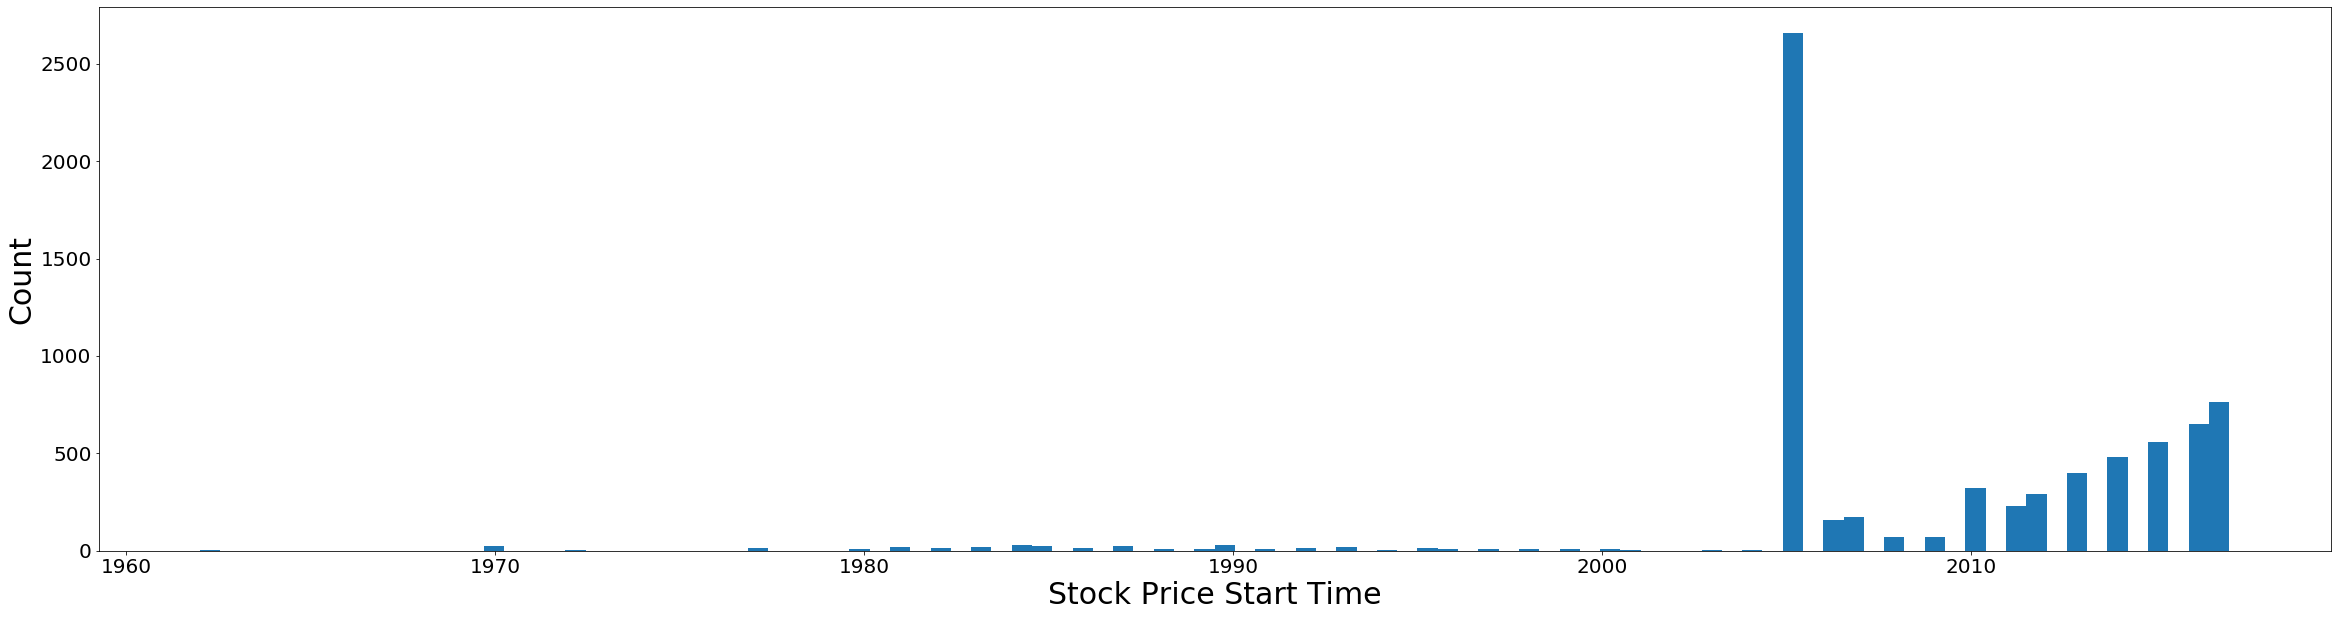

In [373]:
# Group starting date by year
time_start_year = []
for i in time_start:
    year = int(str(i)[0:4])
    time_start_year.append(year)
plt.figure(figsize=(40,10))
plt.hist(time_start_year, bins = 100)
plt.xlabel('Stock Price Start Time', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Feature Engineering
## Procedure included timeframe alignment, missing values adjustment and normalization.


### Choose stocks including a starting date on Jan 02, 2015 and end date Nov 07, 2017.

In [374]:
# Obtain files that contain Jan 02, 2015
list1_file = []
for file in list_of_files:
    try:
        df = pd.read_csv(file)
        time= df.Date
        if '2015-01-02' in time.values:
            list1_file.append(file)
    except pd.io.common.EmptyDataError:
      print(file, " is empty and has been skipped.")
    
print(list1_file)

C:\Users\yanru\Desktop\Data\Stocks\accp.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\amrh.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\amrhw.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\asns.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\bbrx.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\bolt.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\boxl.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\bxg.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\ehr.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\fmax.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\gnst.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\hayu.us.txt  is empty and has been skipped.
C:\Users\yanru\Desktop\Data\Stocks\jt.us.txt  is empt

In [12]:
# From files containing Jan 02, 2015, obtain the ones containing Nov 07, 2017
list2_file=[]
for file in list1_file:   
    df = pd.read_csv(file)
    time= df.Date
    if '2017-11-07' in time.values:
        list2_file.append(file)
print(list2_file)
    

['C:\\Users\\yanru\\Desktop\\Data\\Stocks\\a.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aa.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aaba.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aac.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aal.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aamc.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aame.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aan.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aaoi.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aaon.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aap.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aapl.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aat.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aau.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aav.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aaww.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\aaxn.us.txt', 'C:\\Users\\yanru\\Desktop\\Data\\Stocks\\ab.us.txt', 'C:\\

In [13]:
# Get index of start and end time
df = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\Stocks\\a.us.txt')
df.loc[df['Date']=='2015-01-02'].index

Int64Index([3799], dtype='int64')

In [14]:
# Get index of start and end time
start = []
end = []
for file in list2_file:   
    df = pd.read_csv(file)
    start.append(df.loc[df['Date']=='2015-01-02'].index[0])
    end.append(df.loc[df['Date']=='2017-11-07'].index[0])   

In [15]:
# Further filter and prioratize stocks with the exact matching time frame
i = 0
list3_file=[]
start1=[]
end1=[]

for file in list2_file:
    df = pd.read_csv(file)
    if df.iloc[start[i]:end[i]].shape[0]==718:
        list3_file.append(file)
        start1.append(start[i])
        end1.append(end[i])
    i = i + 1
print(len(list3_file))
print(len(list2_file))

4176
4986


### Normalize price 

In [16]:
# Normalize price of selected stocks and save as normalized files
i = 0
for file in list3_file:
    df = pd.read_csv(file)
    df1 = df.iloc[start1[i]:(end1[i]+1)]
    i = i + 1
    df1_n = pd.DataFrame(df1.Close/df1.Close.max())
    df1_n['Date']=df1['Date']
    new_file = file.split('.txt')[0]+'_normalized.txt'
    df1_n.to_csv(new_file, index=False)

# Visualize data
### Over 4000 stocks normalized to price ranging from 0 to 1 from Jan 02, 2015 to Nov 07, 2017 are visualized as follows

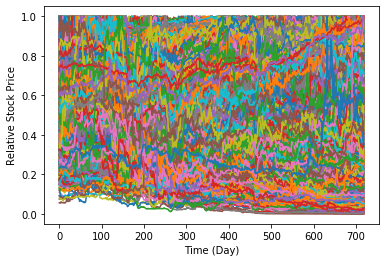

In [17]:
get_file_names('C:\\Users\\yanru\\Desktop\\Data\\Stocks_normalized', 'txt')
for file in list_of_files:
    df = pd.read_csv(file)
    plt.plot(df.Close)
    plt.xlabel('Time (Day)', fontsize = 10)
    plt.ylabel('Relative Stock Price', fontsize = 10)
plt.show()

# Objective 1: Evaluate if stocks can be clustered into subgroups by machine learning
## Prepare for feature file

In [18]:
df = pd.read_csv(list_of_files[0])
feature = np.zeros(df.Close.shape[0]) 

for file in list_of_files:    
    df = pd.read_csv(file)
    price = df.Close.values
    feature = np.vstack((feature,price))
print(feature)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.57672956 0.56592073 0.55710107 ... 1.         0.99780606 0.99824484]
 [0.69057508 0.65051917 0.65539137 ... 0.94089457 0.94428914 0.93789936]
 ...
 [0.7462885  0.74377724 0.74333407 ... 0.98389837 0.99630697 1.        ]
 [0.60822032 0.60452822 0.59863809 ... 0.98537524 1.         0.98192736]
 [0.92294686 0.94057971 0.92898551 ... 0.43115942 0.42753623 0.42270531]]


In [19]:
feature = feature[1:]
feature = pd.DataFrame(feature)
feature.columns = df.Date.values
feature['file']=list_of_files
feature.to_csv('C:\\Users\\yanru\\Desktop\\Data\\feature.csv', index = False)

### Unsupervised learning - tsne
#### Outcome was visualized by both interactive html files (shown in video) and simple 3D plot shown as inline.

In [117]:
# Perform unsupervised learning to attempt grouping stocks.
from sklearn.manifold import TSNE
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py

def plot_manifold (Perplexity, Early_exaggeration, Learning_rate):
    features_only = feature.iloc[:,0:719]
    features_only_log = np.log(np.abs(features_only) + 0.0000001)

    N_components = 3

    X_embedded = TSNE (n_components = N_components,
                   perplexity= Perplexity,
                   early_exaggeration= Early_exaggeration,
                   learning_rate= Learning_rate,
                   init = 'pca',
                   random_state = 1,
                   metric = 'l1',
                   method = 'barnes_hut',
                   n_iter = 10000).fit_transform (features_only_log)

    df = pd.DataFrame(X_embedded)

    x = df.iloc[:,0]
    y = df.iloc[:,1]
    z = df.iloc[:,2]
    df ['file'] = feature ['file']
    print(df)
    return df


for k in range (50, 51):                       
    output = plot_manifold (k, 30, 20)

              0         1         2  \
0     -0.247041  8.176232  1.876010   
1      8.183587  5.463609  1.260459   
2      5.910038  5.975409  0.562710   
3     18.640711 -5.287098 -2.881445   
4     -3.645400 -2.881153  0.871933   
...         ...       ...       ...   
4171  -2.722922  2.911525  1.631104   
4172   9.305756 -9.245081 -2.667940   
4173  -5.723544  0.279556  2.140212   
4174  -3.757456  5.198306  1.824394   
4175  12.618733 -1.930034 -0.093012   

                                                   file  
0     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
1     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
2     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
3     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
...                                                 ...  
4171  C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4172  C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4173  C:\

In [119]:
output.to_csv('C:\\Users\\yanru\\Desktop\\Data\\tsne_output.csv')

In [123]:
# Here an interactive html file with 3D plot is generated
trace1 = go.Scatter3d (x = output.iloc[:,0], y = output.iloc[:,1], z = output.iloc[:,2],
                           text = output.iloc[:,3], 
                       line = dict(width=0),
                       mode = 'markers',
                       marker = dict(size = 5),)

layout = go.Layout ( title = "TSNE plot", 
                    
                         autosize = True,
                         scene = dict (aspectratio = dict (x = 1, y = 1, z = 1), aspectmode = "manual"), 
                         )
data = []
data.append(trace1)
fig = dict (data = data, layout = layout)
plotly.offline.plot (fig, filename = 'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot')


c:\users\yanru\appdata\local\programs\python\python38-32\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `C:\Users\yanru\Desktop\Data\tsne_plot` didn't end with .html. Adding .html to the end of your file.



'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot.html'

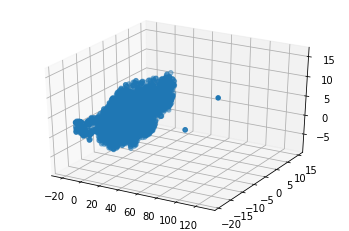

In [378]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

output = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\tsne_output.csv')

ax = plt.axes(projection = '3d')
ax.scatter(output.iloc[:,1], output.iloc[:,2], output.iloc[:,3])

#### Three stocks showed as significant outliers compared with the rest; they are rsls.us, dcix.us and rgse.us. They will be removed to further highlight the difference of other stocks.

In [20]:
# Remove the three outliers

feature_filtered = feature[(feature.file != 'C:\\Users\\yanru\\Desktop\\Data\\Stocks_normalized\\rsls.us_normalized.txt') & 
            (feature.file != 'C:\\Users\\yanru\\Desktop\\Data\\Stocks_normalized\\dcix.us_normalized.txt') &
            (feature.file != 'C:\\Users\\yanru\\Desktop\\Data\\Stocks_normalized\\rgse.us_normalized.txt')]
feature_filtered

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2017-10-26,2017-10-27,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-06,2017-11-07,file
0,0.576730,0.565921,0.557101,0.564517,0.581410,0.577168,0.570309,0.562367,0.555404,0.540471,...,0.990347,0.994149,0.987129,0.995027,0.994881,0.996490,1.000000,0.997806,0.998245,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
1,0.690575,0.650519,0.655391,0.672344,0.691454,0.700619,0.703235,0.687061,0.650100,0.650958,...,0.981430,0.956669,0.946885,0.954073,0.952476,0.947684,0.940895,0.944289,0.937899,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
2,0.694683,0.680282,0.681390,0.672805,0.695514,0.688452,0.675713,0.668790,0.657851,0.640127,...,0.907920,0.934921,0.953475,0.970922,0.977430,0.976322,0.972445,0.992938,1.000000,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
3,0.675084,0.664358,0.656536,0.640000,0.656313,0.673296,0.654078,0.664358,0.662570,0.641341,...,0.185922,0.191285,0.183240,0.176983,0.168715,0.223911,0.225251,0.248939,0.247374,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
4,0.964854,0.964321,0.949298,0.948764,0.960362,0.931034,0.887347,0.902001,0.884290,0.884290,...,0.892980,0.873686,0.867997,0.860099,0.878822,0.870022,0.871661,0.872765,0.853471,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,0.692893,0.687817,0.685279,0.680203,0.654822,0.670051,0.664975,0.649746,0.659898,0.657360,...,0.946701,0.956853,0.969543,0.989848,0.974619,0.984772,0.994924,0.979695,0.939061,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
4172,0.635965,0.636623,0.653728,0.693640,0.690789,0.708772,0.699123,0.722368,0.719956,0.680921,...,0.275000,0.273246,0.271053,0.269298,0.268640,0.268421,0.268421,0.270833,0.263158,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
4173,0.746288,0.743777,0.743334,0.745181,0.754339,0.752050,0.747396,0.744590,0.741709,0.740010,...,0.961888,0.967058,0.972155,0.977325,0.983898,0.984637,0.983898,0.996307,1.000000,C:\Users\yanru\Desktop\Data\Stocks_normalized\...
4174,0.608220,0.604528,0.598638,0.611036,0.620417,0.621408,0.609786,0.601195,0.604270,0.603049,...,0.914363,0.918802,0.907195,0.915513,0.925411,0.965579,0.985375,1.000000,0.981927,C:\Users\yanru\Desktop\Data\Stocks_normalized\...


In [129]:
feature = feature_filtered
for k in range (50, 51):                       
    output = plot_manifold (k, 30, 20)

              0         1         2  \
0     -0.232604  8.777915  1.542635   
1      8.100286  5.629580  0.441955   
2      5.918044  6.414172 -0.495971   
3     18.623627 -5.872881 -2.151446   
4     -3.436782 -2.137010 -1.618750   
...         ...       ...       ...   
4168  -2.883325  3.447373 -0.440728   
4169   9.152778 -9.874289 -1.806617   
4170  -5.585690  0.949662  0.397173   
4171  -3.750920  5.667796  0.677661   
4172  12.457313 -2.130178 -0.052418   

                                                   file  
0     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
1     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
2     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
3     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
...                                                 ...  
4168  C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4169  C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4170  C:\

In [130]:
output.to_csv('C:\\Users\\yanru\\Desktop\\Data\\tsne_output_filtered.csv')

In [131]:
trace1 = go.Scatter3d (x = output.iloc[:,0], y = output.iloc[:,1], z = output.iloc[:,2],
                           text = output.iloc[:,3], 
                       line = dict(width=0),
                       mode = 'markers',
                       marker = dict(size = 5),)

layout = go.Layout ( title = "TSNE plot", 
                    
                         autosize = True,
                         scene = dict (aspectratio = dict (x = 1, y = 1, z = 1), aspectmode = "manual"), 
                         )
data = []
data.append(trace1)
fig = dict (data = data, layout = layout)
plotly.offline.plot (fig, filename = 'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot_filtered')

c:\users\yanru\appdata\local\programs\python\python38-32\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `C:\Users\yanru\Desktop\Data\tsne_plot_filtered` didn't end with .html. Adding .html to the end of your file.



'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot_filtered.html'

### As can be seen from the following plot, after removing outliers, there were still no obvious grouping.

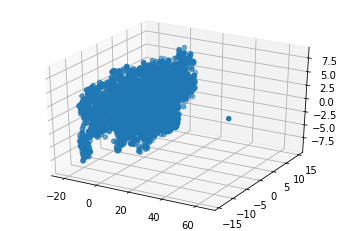

In [380]:
output = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\tsne_output_filtered.csv')

ax = plt.axes(projection = '3d')
ax.scatter(output.iloc[:,1], output.iloc[:,2], output.iloc[:,3])

### Try a few more parameters, more specifically, perplexity of the model will be enhanced.

In [132]:
for k in range (200, 201):                       
    output = plot_manifold (k, 50, 20)

              0         1         2  \
0     -1.347366  5.416272  0.197909   
1      3.747442  4.299966  0.753379   
2      2.516113  4.620163  0.391376   
3     10.424280 -1.930800 -0.503040   
4     -2.791338 -1.352878 -2.794264   
...         ...       ...       ...   
4168  -2.751229  2.919983 -1.510669   
4169   5.485852 -4.647175 -0.473009   
4170  -4.706804  0.533998 -1.641763   
4171  -3.502487  3.374764 -0.671092   
4172   6.742037 -0.310876  0.539524   

                                                   file  
0     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
1     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
2     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
3     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4     C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
...                                                 ...  
4168  C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4169  C:\Users\yanru\Desktop\Data\Stocks_normalized\...  
4170  C:\

In [133]:
output.to_csv('C:\\Users\\yanru\\Desktop\\Data\\tsne_output_filtered1.csv')

In [134]:
trace1 = go.Scatter3d (x = output.iloc[:,0], y = output.iloc[:,1], z = output.iloc[:,2],
                           text = output.iloc[:,3], 
                       line = dict(width=0),
                       mode = 'markers',
                       marker = dict(size = 5),)

layout = go.Layout ( title = "TSNE plot", 
                    
                         autosize = True,
                         scene = dict (aspectratio = dict (x = 1, y = 1, z = 1), aspectmode = "manual"), 
                         )
data = []
data.append(trace1)
fig = dict (data = data, layout = layout)
plotly.offline.plot (fig, filename = 'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot_filtered1')

c:\users\yanru\appdata\local\programs\python\python38-32\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `C:\Users\yanru\Desktop\Data\tsne_plot_filtered1` didn't end with .html. Adding .html to the end of your file.



'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot_filtered1.html'

### After changing perplexity, a subgroup of 20 stocks were clustered together.

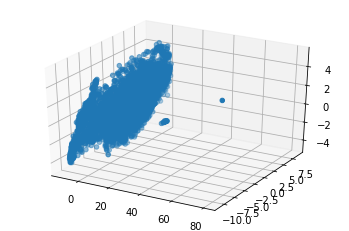

In [381]:
output = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\tsne_output_filtered1.csv')

ax = plt.axes(projection = '3d')
ax.scatter(output.iloc[:,1], output.iloc[:,2], output.iloc[:,3])

### Identify potential reasons for clustering.
### The following stocks were clustered together.


In [21]:
df = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\stock sector.csv')
df

,Symbol,Company,Sector
0,apen.us,NaN,NaN
1,aezs.us,AEterna Zentaris Inc,Health Care/Life Sciences
2,scl.us,Stepan Co.,Basic Materials/Resources
3,sgmo.us,Singha Estate PCL,Real Estate/Construction
4,orcl.us,Oracle Corp.,Technology
5,ptsi.us,P.A.M. Transportation Services Inc.,Transportation/Logistics
6,egl.us,NaN,NaN
7,hix.us,Western Asset High Income Fund II Inc.,Financial Services
8,amda.us,AMIDEX 35 Israel Mutual Fund;A,Mutual Fund
9,out.us,Outfront Media Inc.,Business/Consumer Services


#### Based on visualization,  these 20 stocks seem to belong to two clusters rather than one. To further explore if we can obtain more precise insight, dimension reduction technique will be depolyed first prior to unsupervised learning. 

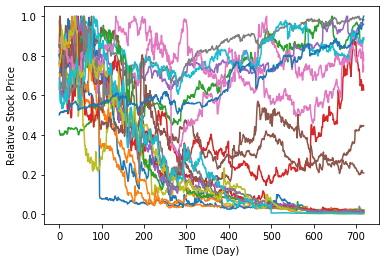

In [22]:
file_cluster = []
path = 'C:\\Users\\yanru\\Desktop\\Data\\Stocks_normalized\\'
for stock in df.Symbol:
    file_cluster.append(path + stock + '_normalized.txt')

for file in file_cluster:
    df = pd.read_csv(file)
    plt.plot(df.Close)
    plt.xlabel('Time (Day)', fontsize = 10)
    plt.ylabel('Relative Stock Price', fontsize = 10)
plt.show()

#### Try dimension reduction using princlple component analysis, results look inconclusive

In [382]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
input = feature.iloc[:,0:719]
pca_output = pca.fit_transform(input)


In [389]:
pca_output = pd.DataFrame(pca_output)
trace1 = go.Scatter3d (x = pca_output.iloc[:,0], y = pca_output.iloc[:,1], z = pca_output.iloc[:,2],
                           text = output.iloc[:,3], 
                       line = dict(width=0),
                       mode = 'markers',
                       marker = dict(size = 5),)

layout = go.Layout ( title = "TSNE plot", 
                    
                         autosize = True,
                         scene = dict (aspectratio = dict (x = 1, y = 1, z = 1), aspectmode = "manual"), 
                         )
data = []
data.append(trace1)
fig = dict (data = data, layout = layout)
plotly.offline.plot (fig, filename = 'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot_filtered1_reduced1')

C:\Users\yanru\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `C:\Users\yanru\Desktop\Data\tsne_plot_filtered1_reduced1` didn't end with .html. Adding .html to the end of your file.



'C:\\Users\\yanru\\Desktop\\Data\\tsne_plot_filtered1_reduced1.html'

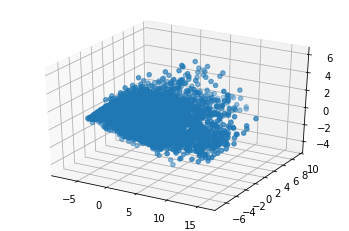

In [391]:
ax = plt.axes(projection = '3d')
ax.scatter(pca_output.iloc[:,0], pca_output.iloc[:,1], pca_output.iloc[:,2])

### Unsupervised learning revealed two clusters of stocks; visual inspection showed more potential clusters. The clusters did not seem to belong to any specific industry sectors. Dimension reduction technique PCA did not improve the outcome. A few selected stocks from the same cluster (20 stocks) will be used for deep learning.

# Objective 2: Use deep learning to predict stock price 
## Deep learning - recurrent neural network

#### Select four stocks to implement deep learning; they are bcei.us, cmls.us, atos.us and chfs.us.

In [156]:
price_list = []
for file in file_cluster:
    df = pd.read_csv(file)
    price = df.Close
    price_list.append(price)
price_df = pd.DataFrame(price_list)
df1 = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\stock sector.csv')
price_df['stock'] = df1.Symbol.values
price_df.to_csv('C:\\Users\\yanru\\Desktop\\Data\\price_cluster.csv')


### Visualize the price of these four stocks after normalization. The plot showed that they do display similar trend.

<function matplotlib.pyplot.show(*args, **kw)>

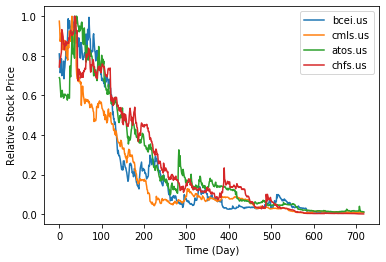

In [23]:
df = pd.read_csv('C:\\Users\\yanru\\Desktop\\Data\\price_cluster.csv')
df1 = df[df['stock'].isin(['bcei.us','cmls.us','atos.us','chfs.us'])]
for i in range(4):
    plt.plot(df1.iloc[i,1:], label = df1['stock'].iloc[i])
    plt.xlabel('Time (Day)', fontsize = 10)
    plt.ylabel('Relative Stock Price', fontsize = 10)
    plt.xticks(np.arange(0, df1.shape[1], 100))
    plt.legend(loc='upper right')
plt.show

In [211]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, LSTM
import h5py

In [28]:
df2 = df1.T.iloc[1:,]
df2.columns = df1.stock.values
df2

,bcei.us,cmls.us,atos.us,chfs.us
0,0.809857,0.975113,0.689655,0.743501
1,0.760584,0.941176,0.684729,0.77643
2,0.714616,0.873303,0.655172,0.766031
3,0.721231,0.884615,0.625616,0.790295
4,0.74504,0.914027,0.591133,0.805893
...,...,...,...,...
714,0.0103784,0.0121606,0.0136782,0.00194974
715,0.0103251,0.0104638,0.0132972,0.00178654
716,0.0102125,0.00876697,0.0124795,0.00188619
717,0.0102984,0.00792421,0.0124795,0.00178798


In [132]:
# This section is based on the IBM deep learning tutorials.
batch_size = 32
epochs = 120
timesteps = 5

def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [348]:
# This section is based on the IBM deep learning tutorials.
def Deep_learning_train_test (stock, model_file):
    
    df_data_1 = df2[[stock]]
    length = get_train_length(df_data_1, batch_size, 0.3)
    upper_train = length + timesteps*2
    df_data_1_train = df_data_1[0:upper_train]
    
    training_set = df_data_1_train.iloc[:,0:1].values
    training_set_scaled = training_set

    X_train = []
    y_train = []

    # Creating a data structure with n timesteps

    for i in range(timesteps, length + timesteps): 
        X_train.append(training_set_scaled[i-timesteps:i,0])
        y_train.append(training_set_scaled[i:i+timesteps,0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

    inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))

    lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
    lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

    output_1_mae = Dense(units = 1)(lstm_2_mae)

    regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

  
    regressor_mae.compile(optimizer='adam', loss = 'mae')
    regressor_mae.summary()

    X_train=np.asarray(X_train).astype(np.float32)
    y_train=np.asarray(y_train).astype(np.float32)

    epochs = 300
    #Statefull
    for i in range(epochs):
        print("Epoch: " + str(i))
        regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
        regressor_mae.reset_states()
    

    # save model
    
    regressor_mae.save(filepath=model_file)

    #load model
    regressor_mae = load_model(filepath=model_file)


    test_length = get_test_length(df_data_1, batch_size)
    upper_test = test_length + timesteps*2
    testset_length = test_length - upper_train

    # construct test set

    #subsetting
    df_data_1_test = df_data_1[upper_train:upper_test] 
    test_set = df_data_1_test.iloc[:,0:1].values

    #scaling
    scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

    #creating input data
    X_test = []
    for i in range(timesteps, testset_length + timesteps):
        X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
    X_test = np.array(X_test)

    #reshaping
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    X_test=np.asarray(X_test).astype(np.float32)

    #prediction
    predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
    regressor_mae.reset_states()

    #reshaping
    predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

    #inverse transform
    predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)

    #creating y_test data
    y_test = []
    for j in range(0, testset_length - timesteps):
        y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

    # reshaping
    y_test = np.reshape(y_test, (y_test.shape[0], 1))

    y_test=np.asarray(y_test).astype(np.float32)
    
    return test_set, y_test


# Visualising the results
def Deep_learning_plot(test_set, y_test, stock):
    plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'actual price')
    plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'predicted price')
    plt.legend(loc='upper right')
    plt.title(stock)

    plt.show()

### Predict the price of bcei.us

In [286]:
test_set, y_test = Deep_learning_train_test (stock = 'bcei.us', model_file = 'bcei_5_ts.h5')

416
448
480
Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(32, 5, 1)]              0         
_________________________________________________________________
lstm_76 (LSTM)               (32, 5, 10)               480       
_________________________________________________________________
lstm_77 (LSTM)               (32, 5, 10)               840       
_________________________________________________________________
dense_38 (Dense)             (32, 5, 1)                11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 480 samples
480/480 [==============================] - 1s 3ms/sample - loss: 0.2623
Epoch: 1
Train on 480 samples
480/480 [==============================] - 0s 174us/sample - loss: 0.2125
Epoch: 2
Train on 480 samples
480/48

480/480 [==============================] - 0s 163us/sample - loss: 0.0630
Epoch: 70
Train on 480 samples
480/480 [==============================] - 0s 191us/sample - loss: 0.0636
Epoch: 71
Train on 480 samples
480/480 [==============================] - 0s 155us/sample - loss: 0.0619
Epoch: 72
Train on 480 samples
480/480 [==============================] - 0s 138us/sample - loss: 0.0627
Epoch: 73
Train on 480 samples
480/480 [==============================] - 0s 169us/sample - loss: 0.0607
Epoch: 74
Train on 480 samples
480/480 [==============================] - 0s 119us/sample - loss: 0.0622
Epoch: 75
Train on 480 samples
480/480 [==============================] - 0s 143us/sample - loss: 0.0600
Epoch: 76
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0616
Epoch: 77
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0594
Epoch: 78
Train on 480 samples
480/480 [==============================] - 0s 163us/sam

480/480 [==============================] - 0s 172us/sample - loss: 0.0474
Epoch: 147
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0483
Epoch: 148
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0423
Epoch: 149
Train on 480 samples
480/480 [==============================] - 0s 128us/sample - loss: 0.0427
Epoch: 150
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0480
Epoch: 151
Train on 480 samples
480/480 [==============================] - 0s 165us/sample - loss: 0.0440
Epoch: 152
Train on 480 samples
480/480 [==============================] - 0s 173us/sample - loss: 0.0439
Epoch: 153
Train on 480 samples
480/480 [==============================] - 0s 164us/sample - loss: 0.0420
Epoch: 154
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0465
Epoch: 155
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 130us/sample - loss: 0.0369
Epoch: 224
Train on 480 samples
480/480 [==============================] - 0s 155us/sample - loss: 0.0454
Epoch: 225
Train on 480 samples
480/480 [==============================] - 0s 139us/sample - loss: 0.0359
Epoch: 226
Train on 480 samples
480/480 [==============================] - 0s 156us/sample - loss: 0.0402
Epoch: 227
Train on 480 samples
480/480 [==============================] - 0s 161us/sample - loss: 0.0341
Epoch: 228
Train on 480 samples
480/480 [==============================] - 0s 172us/sample - loss: 0.0369
Epoch: 229
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0319
Epoch: 230
Train on 480 samples
480/480 [==============================] - 0s 154us/sample - loss: 0.0325
Epoch: 231
Train on 480 samples
480/480 [==============================] - 0s 161us/sample - loss: 0.0357
Epoch: 232
Train on 480 samples
480/480 [==============================] - 0s 

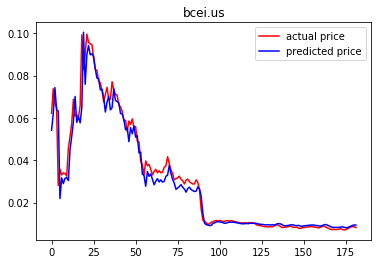

In [287]:
Deep_learning_plot(test_set, y_test, 'bcei.us')

### Try the other 3 stocks, 'cmls.us','atos.us','chfs.us'

In [146]:
test_set, y_test = Deep_learning_train_test (stock = 'cmls.us', model_file = 'cmls_5_ts.h5')

416
448
480
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(32, 5, 1)]              0         
_________________________________________________________________
lstm_16 (LSTM)               (32, 5, 10)               480       
_________________________________________________________________
lstm_17 (LSTM)               (32, 5, 10)               840       
_________________________________________________________________
dense_8 (Dense)              (32, 5, 1)                11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 480 samples
480/480 [==============================] - 2s 3ms/sample - loss: 0.1876
Epoch: 1
Train on 480 samples
480/480 [==============================] - 0s 195us/sample - loss: 0.1638
Epoch: 2
Train on 480 samples
480/480

480/480 [==============================] - 0s 174us/sample - loss: 0.0592
Epoch: 70
Train on 480 samples
480/480 [==============================] - 0s 147us/sample - loss: 0.0615
Epoch: 71
Train on 480 samples
480/480 [==============================] - 0s 141us/sample - loss: 0.0581
Epoch: 72
Train on 480 samples
480/480 [==============================] - 0s 172us/sample - loss: 0.0593
Epoch: 73
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0564
Epoch: 74
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0571
Epoch: 75
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0547
Epoch: 76
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0543
Epoch: 77
Train on 480 samples
480/480 [==============================] - ETA: 0s - loss: 0.063 - 0s 130us/sample - loss: 0.0533
Epoch: 78
Train on 480 samples
480/480 [======================

480/480 [==============================] - 0s 163us/sample - loss: 0.0516
Epoch: 147
Train on 480 samples
480/480 [==============================] - 0s 134us/sample - loss: 0.0477
Epoch: 148
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0446
Epoch: 149
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0444
Epoch: 150
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0555
Epoch: 151
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0583
Epoch: 152
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0485
Epoch: 153
Train on 480 samples
480/480 [==============================] - 0s 171us/sample - loss: 0.0478
Epoch: 154
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0446
Epoch: 155
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 149us/sample - loss: 0.0339
Epoch: 223
Train on 480 samples
480/480 [==============================] - 0s 141us/sample - loss: 0.0358
Epoch: 224
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0453
Epoch: 225
Train on 480 samples
480/480 [==============================] - 0s 128us/sample - loss: 0.0391
Epoch: 226
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0371
Epoch: 227
Train on 480 samples
480/480 [==============================] - 0s 145us/sample - loss: 0.0338
Epoch: 228
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0440
Epoch: 229
Train on 480 samples
480/480 [==============================] - 0s 159us/sample - loss: 0.0463
Epoch: 230
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0353
Epoch: 231
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 157us/sample - loss: 0.0282
522
554
586
618
650
682


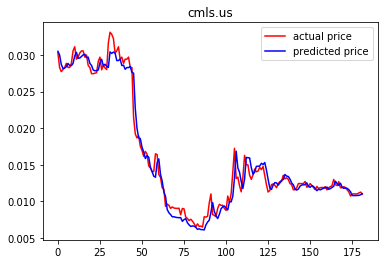

In [147]:
Deep_learning_plot(test_set, y_test, 'cmls.us')

In [215]:
test_set, y_test = Deep_learning_train_test (stock = 'atos.us', model_file = 'atos_5_ts.h5')

416
448
480
Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(32, 5, 1)]              0         
_________________________________________________________________
lstm_46 (LSTM)               (32, 5, 10)               480       
_________________________________________________________________
lstm_47 (LSTM)               (32, 5, 10)               840       
_________________________________________________________________
dense_23 (Dense)             (32, 5, 1)                11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 480 samples
480/480 [==============================] - 2s 3ms/sample - loss: 0.2603
Epoch: 1
Train on 480 samples
480/480 [==============================] - 0s 173us/sample - loss: 0.1870
Epoch: 2
Train on 480 samples
480/48

480/480 [==============================] - 0s 164us/sample - loss: 0.0722
Epoch: 70
Train on 480 samples
480/480 [==============================] - 0s 195us/sample - loss: 0.0728
Epoch: 71
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0651
Epoch: 72
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0744
Epoch: 73
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0671
Epoch: 74
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0627
Epoch: 75
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0716
Epoch: 76
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0691
Epoch: 77
Train on 480 samples
480/480 [==============================] - 0s 157us/sample - loss: 0.0625
Epoch: 78
Train on 480 samples
480/480 [==============================] - 0s 170us/sam

480/480 [==============================] - 0s 212us/sample - loss: 0.0548
Epoch: 147
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0526
Epoch: 148
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0665
Epoch: 149
Train on 480 samples
480/480 [==============================] - 0s 168us/sample - loss: 0.0715
Epoch: 150
Train on 480 samples
480/480 [==============================] - 0s 135us/sample - loss: 0.0561
Epoch: 151
Train on 480 samples
480/480 [==============================] - 0s 175us/sample - loss: 0.0496
Epoch: 152
Train on 480 samples
480/480 [==============================] - 0s 139us/sample - loss: 0.0542
Epoch: 153
Train on 480 samples
480/480 [==============================] - 0s 139us/sample - loss: 0.0577
Epoch: 154
Train on 480 samples
480/480 [==============================] - 0s 165us/sample - loss: 0.0499
Epoch: 155
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 163us/sample - loss: 0.0483
Epoch: 224
Train on 480 samples
480/480 [==============================] - 0s 154us/sample - loss: 0.0472
Epoch: 225
Train on 480 samples
480/480 [==============================] - 0s 141us/sample - loss: 0.0500
Epoch: 226
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0475
Epoch: 227
Train on 480 samples
480/480 [==============================] - 0s 150us/sample - loss: 0.0472
Epoch: 228
Train on 480 samples
480/480 [==============================] - 0s 140us/sample - loss: 0.0492
Epoch: 229
Train on 480 samples
480/480 [==============================] - 0s 174us/sample - loss: 0.0470
Epoch: 230
Train on 480 samples
480/480 [==============================] - 0s 135us/sample - loss: 0.0471
Epoch: 231
Train on 480 samples
480/480 [==============================] - 0s 146us/sample - loss: 0.0481
Epoch: 232
Train on 480 samples
480/480 [==============================] - 0s 

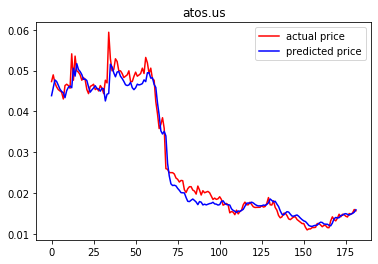

In [216]:
Deep_learning_plot(test_set, y_test, 'atos.us')

In [150]:
test_set, y_test = Deep_learning_train_test (stock = 'chfs.us', model_file = 'chfs_5_ts.h5')

416
448
480
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(32, 5, 1)]              0         
_________________________________________________________________
lstm_20 (LSTM)               (32, 5, 10)               480       
_________________________________________________________________
lstm_21 (LSTM)               (32, 5, 10)               840       
_________________________________________________________________
dense_10 (Dense)             (32, 5, 1)                11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 480 samples
480/480 [==============================] - 1s 3ms/sample - loss: 0.2705
Epoch: 1
Train on 480 samples
480/480 [==============================] - 0s 178us/sample - loss: 0.2205
Epoch: 2
Train on 480 samples
480/48

480/480 [==============================] - 0s 208us/sample - loss: 0.0912
Epoch: 70
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0683
Epoch: 71
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0673
Epoch: 72
Train on 480 samples
480/480 [==============================] - 0s 146us/sample - loss: 0.0686
Epoch: 73
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0653
Epoch: 74
Train on 480 samples
480/480 [==============================] - 0s 162us/sample - loss: 0.0664
Epoch: 75
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0714
Epoch: 76
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0669
Epoch: 77
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0789
Epoch: 78
Train on 480 samples
480/480 [==============================] - 0s 130us/sam

480/480 [==============================] - 0s 130us/sample - loss: 0.0673
Epoch: 147
Train on 480 samples
480/480 [==============================] - 0s 155us/sample - loss: 0.0581
Epoch: 148
Train on 480 samples
480/480 [==============================] - 0s 173us/sample - loss: 0.0570
Epoch: 149
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0645
Epoch: 150
Train on 480 samples
480/480 [==============================] - 0s 155us/sample - loss: 0.0573
Epoch: 151
Train on 480 samples
480/480 [==============================] - 0s 134us/sample - loss: 0.0605
Epoch: 152
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0592
Epoch: 153
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0695
Epoch: 154
Train on 480 samples
480/480 [==============================] - 0s 175us/sample - loss: 0.0553
Epoch: 155
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 130us/sample - loss: 0.0549
Epoch: 224
Train on 480 samples
480/480 [==============================] - 0s 141us/sample - loss: 0.0548
Epoch: 225
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0545
Epoch: 226
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0542
Epoch: 227
Train on 480 samples
480/480 [==============================] - 0s 140us/sample - loss: 0.0566
Epoch: 228
Train on 480 samples
480/480 [==============================] - 0s 139us/sample - loss: 0.0518
Epoch: 229
Train on 480 samples
480/480 [==============================] - 0s 148us/sample - loss: 0.0563
Epoch: 230
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0536
Epoch: 231
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0564
Epoch: 232
Train on 480 samples
480/480 [==============================] - 0s 

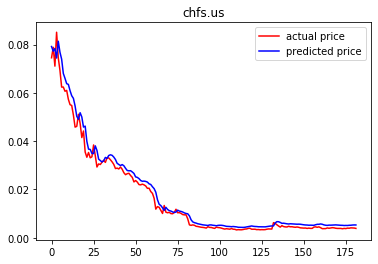

In [151]:
Deep_learning_plot(test_set, y_test, 'chfs.us')

### Tune the deep learning model by timesteps. Both visualization and a mathematical evaluation metric (mean absolute error) will be used to compare different models.

In [352]:
timesteps = 10
test_set, y_test = Deep_learning_train_test (stock = 'bcei.us', model_file = 'bcei_10_ts.h5')

416
448
480
Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(32, 10, 1)]             0         
_________________________________________________________________
lstm_94 (LSTM)               (32, 10, 10)              480       
_________________________________________________________________
lstm_95 (LSTM)               (32, 10, 10)              840       
_________________________________________________________________
dense_47 (Dense)             (32, 10, 1)               11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 480 samples
480/480 [==============================] - 1s 3ms/sample - loss: 0.2575
Epoch: 1
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.1733
Epoch: 2
Train on 480 samples
480/48

480/480 [==============================] - 0s 195us/sample - loss: 0.0649
Epoch: 70
Train on 480 samples
480/480 [==============================] - 0s 260us/sample - loss: 0.0696
Epoch: 71
Train on 480 samples
480/480 [==============================] - 0s 195us/sample - loss: 0.0646
Epoch: 72
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0692
Epoch: 73
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0644
Epoch: 74
Train on 480 samples
480/480 [==============================] - 0s 195us/sample - loss: 0.0690
Epoch: 75
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0640
Epoch: 76
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0686
Epoch: 77
Train on 480 samples
480/480 [==============================] - 0s 244us/sample - loss: 0.0637
Epoch: 78
Train on 480 samples
480/480 [==============================] - 0s 228us/sam

480/480 [==============================] - 0s 228us/sample - loss: 0.0623
Epoch: 147
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0559
Epoch: 148
Train on 480 samples
480/480 [==============================] - 0s 245us/sample - loss: 0.0622
Epoch: 149
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0559
Epoch: 150
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0624
Epoch: 151
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0558
Epoch: 152
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0627
Epoch: 153
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0561
Epoch: 154
Train on 480 samples
480/480 [==============================] - 0s 203us/sample - loss: 0.0624
Epoch: 155
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 195us/sample - loss: 0.0488
Epoch: 224
Train on 480 samples
480/480 [==============================] - 0s 195us/sample - loss: 0.0507
Epoch: 225
Train on 480 samples
480/480 [==============================] - 0s 195us/sample - loss: 0.0476
Epoch: 226
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0484
Epoch: 227
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0494
Epoch: 228
Train on 480 samples
480/480 [==============================] - 0s 230us/sample - loss: 0.0516
Epoch: 229
Train on 480 samples
480/480 [==============================] - 0s 228us/sample - loss: 0.0529
Epoch: 230
Train on 480 samples
480/480 [==============================] - 0s 230us/sample - loss: 0.0473
Epoch: 231
Train on 480 samples
480/480 [==============================] - 0s 260us/sample - loss: 0.0485
Epoch: 232
Train on 480 samples
480/480 [==============================] - 0s 

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 182 samples

### The following function is the model evaluation metric: mean absolute error.

In [344]:
def Mean_absolute_error():
    n = len(test_set[timesteps:len(y_test)].astype(float))
    MAE = 0
    for i in range (n):
        a = test_set[timesteps:len(y_test)].astype(float)[i]
        b = y_test[0:len(y_test) - timesteps].astype(float)[i]
        MAE = MAE + abs(a- b)
    MAE = MAE/n
    print(MAE)
    return MAE

In [353]:
MAE = Mean_absolute_error()

[0.00602687]


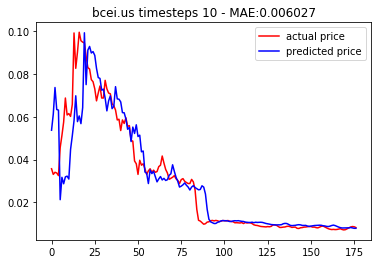

In [354]:
Deep_learning_plot(test_set, y_test, 'bcei.us timesteps 10' +' - MAE:' + str(round(MAE[0],6)))

In [349]:
timesteps = 5
test_set, y_test = Deep_learning_train_test (stock = 'bcei.us', model_file = 'bcei_5_ts.h5')

416
448
480
Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(32, 5, 1)]              0         
_________________________________________________________________
lstm_92 (LSTM)               (32, 5, 10)               480       
_________________________________________________________________
lstm_93 (LSTM)               (32, 5, 10)               840       
_________________________________________________________________
dense_46 (Dense)             (32, 5, 1)                11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 480 samples
480/480 [==============================] - 2s 4ms/sample - loss: 0.3348
Epoch: 1
Train on 480 samples
480/480 [==============================] - ETA: 0s - loss: 0.369 - 0s 163us/sample - loss: 0.2698
Epoch: 2
Tra

480/480 [==============================] - 0s 141us/sample - loss: 0.0645
Epoch: 70
Train on 480 samples
480/480 [==============================] - 0s 164us/sample - loss: 0.0625
Epoch: 71
Train on 480 samples
480/480 [==============================] - 0s 133us/sample - loss: 0.0644
Epoch: 72
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0625
Epoch: 73
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0648
Epoch: 74
Train on 480 samples
480/480 [==============================] - 0s 151us/sample - loss: 0.0624
Epoch: 75
Train on 480 samples
480/480 [==============================] - 0s 162us/sample - loss: 0.0659
Epoch: 76
Train on 480 samples
480/480 [==============================] - 0s 134us/sample - loss: 0.0617
Epoch: 77
Train on 480 samples
480/480 [==============================] - 0s 142us/sample - loss: 0.0650
Epoch: 78
Train on 480 samples
480/480 [==============================] - 0s 163us/sam

480/480 [==============================] - 0s 130us/sample - loss: 0.0449
Epoch: 147
Train on 480 samples
480/480 [==============================] - 0s 168us/sample - loss: 0.0445
Epoch: 148
Train on 480 samples
480/480 [==============================] - 0s 139us/sample - loss: 0.0521
Epoch: 149
Train on 480 samples
480/480 [==============================] - 0s 146us/sample - loss: 0.0457
Epoch: 150
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0444
Epoch: 151
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0498
Epoch: 152
Train on 480 samples
480/480 [==============================] - 0s 130us/sample - loss: 0.0459
Epoch: 153
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0450
Epoch: 154
Train on 480 samples
480/480 [==============================] - 0s 129us/sample - loss: 0.0479
Epoch: 155
Train on 480 samples
480/480 [==============================] - 0s 

480/480 [==============================] - 0s 144us/sample - loss: 0.0443
Epoch: 224
Train on 480 samples
480/480 [==============================] - 0s 181us/sample - loss: 0.0413
Epoch: 225
Train on 480 samples
480/480 [==============================] - 0s 139us/sample - loss: 0.0341
Epoch: 226
Train on 480 samples
480/480 [==============================] - 0s 178us/sample - loss: 0.0354
Epoch: 227
Train on 480 samples
480/480 [==============================] - 0s 141us/sample - loss: 0.0339
Epoch: 228
Train on 480 samples
480/480 [==============================] - 0s 144us/sample - loss: 0.0358
Epoch: 229
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0403
Epoch: 230
Train on 480 samples
480/480 [==============================] - 0s 163us/sample - loss: 0.0335
Epoch: 231
Train on 480 samples
480/480 [==============================] - 0s 144us/sample - loss: 0.0336
Epoch: 232
Train on 480 samples
480/480 [==============================] - ETA

In [350]:
MAE = Mean_absolute_error()

[0.00283965]


### As can be seen, timesteps had a significant impact on the effectiveness of the model. Lower timesteps in this case produced much better result.

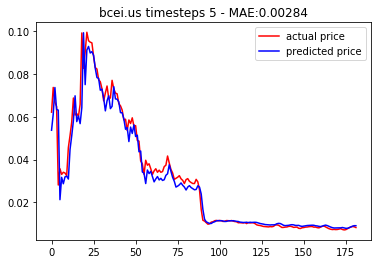

In [351]:
Deep_learning_plot(test_set, y_test, 'bcei.us timesteps 5' +' - MAE:' + str(round(MAE[0],6)))

### Try other values batch size. 32, 64 and 128 were evaluated, and they seemed to produce equivalent results. 

In [355]:
batch_size = 64
timesteps = 5
test_set, y_test = Deep_learning_train_test (stock = 'bcei.us', model_file = 'bcei_5_ts_b64.h5')

448
Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(64, 5, 1)]              0         
_________________________________________________________________
lstm_96 (LSTM)               (64, 5, 10)               480       
_________________________________________________________________
lstm_97 (LSTM)               (64, 5, 10)               840       
_________________________________________________________________
dense_48 (Dense)             (64, 5, 1)                11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 448 samples
448/448 [==============================] - 1s 3ms/sample - loss: 0.2901
Epoch: 1
Train on 448 samples
448/448 [==============================] - 0s 139us/sample - loss: 0.2600
Epoch: 2
Train on 448 samples
448/448 [=====

448/448 [==============================] - 0s 70us/sample - loss: 0.0923
Epoch: 71
Train on 448 samples
448/448 [==============================] - 0s 99us/sample - loss: 0.0931
Epoch: 72
Train on 448 samples
448/448 [==============================] - 0s 105us/sample - loss: 0.0918
Epoch: 73
Train on 448 samples
448/448 [==============================] - 0s 84us/sample - loss: 0.0924
Epoch: 74
Train on 448 samples
448/448 [==============================] - 0s 105us/sample - loss: 0.0915
Epoch: 75
Train on 448 samples
448/448 [==============================] - 0s 105us/sample - loss: 0.0919
Epoch: 76
Train on 448 samples
448/448 [==============================] - 0s 112us/sample - loss: 0.0910
Epoch: 77
Train on 448 samples
448/448 [==============================] - 0s 93us/sample - loss: 0.0914
Epoch: 78
Train on 448 samples
448/448 [==============================] - 0s 104us/sample - loss: 0.0904
Epoch: 79
Train on 448 samples
448/448 [==============================] - 0s 70us/sample -

448/448 [==============================] - 0s 105us/sample - loss: 0.0736
Epoch: 149
Train on 448 samples
448/448 [==============================] - 0s 93us/sample - loss: 0.0760
Epoch: 150
Train on 448 samples
448/448 [==============================] - 0s 105us/sample - loss: 0.0733
Epoch: 151
Train on 448 samples
448/448 [==============================] - 0s 70us/sample - loss: 0.0820
Epoch: 152
Train on 448 samples
448/448 [==============================] - 0s 105us/sample - loss: 0.0735
Epoch: 153
Train on 448 samples
448/448 [==============================] - 0s 90us/sample - loss: 0.0763
Epoch: 154
Train on 448 samples
448/448 [==============================] - 0s 73us/sample - loss: 0.0718
Epoch: 155
Train on 448 samples
448/448 [==============================] - 0s 73us/sample - loss: 0.0727
Epoch: 156
Train on 448 samples
448/448 [==============================] - 0s 70us/sample - loss: 0.0714
Epoch: 157
Train on 448 samples
448/448 [==============================] - 0s 70us/s

448/448 [==============================] - 0s 70us/sample - loss: 0.0475
Epoch: 227
Train on 448 samples
448/448 [==============================] - 0s 102us/sample - loss: 0.0464
Epoch: 228
Train on 448 samples
448/448 [==============================] - 0s 70us/sample - loss: 0.0474
Epoch: 229
Train on 448 samples
448/448 [==============================] - 0s 70us/sample - loss: 0.0460
Epoch: 230
Train on 448 samples
448/448 [==============================] - 0s 105us/sample - loss: 0.0471
Epoch: 231
Train on 448 samples
448/448 [==============================] - 0s 70us/sample - loss: 0.0455
Epoch: 232
Train on 448 samples
448/448 [==============================] - 0s 90us/sample - loss: 0.0467
Epoch: 233
Train on 448 samples
448/448 [==============================] - 0s 85us/sample - loss: 0.0452
Epoch: 234
Train on 448 samples
448/448 [==============================] - 0s 70us/sample - loss: 0.0460
Epoch: 235
Train on 448 samples
448/448 [==============================] - 0s 105us/s

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 224 samples

In [356]:
MAE = Mean_absolute_error()

[0.00283965]


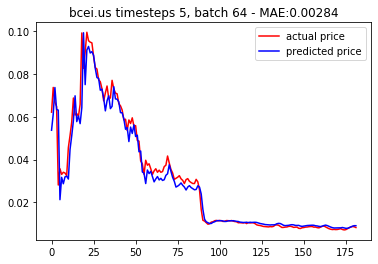

In [358]:
Deep_learning_plot(test_set, y_test, 'bcei.us timesteps 5, batch 64' +' - MAE:' + str(round(MAE[0],6)))

In [360]:
batch_size = 100
timesteps = 5
test_set, y_test = Deep_learning_train_test (stock = 'bcei.us', model_file = 'bcei_5_ts_b100.h5')

500
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(100, 5, 1)]             0         
_________________________________________________________________
lstm_98 (LSTM)               (100, 5, 10)              480       
_________________________________________________________________
lstm_99 (LSTM)               (100, 5, 10)              840       
_________________________________________________________________
dense_49 (Dense)             (100, 5, 1)               11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
Epoch: 0
Train on 500 samples
500/500 [==============================] - 2s 4ms/sample - loss: 0.2259
Epoch: 1
Train on 500 samples
500/500 [==============================] - 0s 62us/sample - loss: 0.2231
Epoch: 2
Train on 500 samples
500/500 [======

Epoch: 70
Train on 500 samples
500/500 [==============================] - 0s 52us/sample - loss: 0.1268
Epoch: 71
Train on 500 samples
500/500 [==============================] - 0s 65us/sample - loss: 0.1247
Epoch: 72
Train on 500 samples
500/500 [==============================] - 0s 84us/sample - loss: 0.1224
Epoch: 73
Train on 500 samples
500/500 [==============================] - 0s 36us/sample - loss: 0.1204
Epoch: 74
Train on 500 samples
500/500 [==============================] - 0s 35us/sample - loss: 0.1187
Epoch: 75
Train on 500 samples
500/500 [==============================] - 0s 51us/sample - loss: 0.1174
Epoch: 76
Train on 500 samples
500/500 [==============================] - 0s 44us/sample - loss: 0.1162
Epoch: 77
Train on 500 samples
500/500 [==============================] - 0s 62us/sample - loss: 0.1151
Epoch: 78
Train on 500 samples
500/500 [==============================] - 0s 44us/sample - loss: 0.1142
Epoch: 79
Train on 500 samples
500/500 [========================

500/500 [==============================] - 0s 41us/sample - loss: 0.0714
Epoch: 149
Train on 500 samples
500/500 [==============================] - 0s 62us/sample - loss: 0.0719
Epoch: 150
Train on 500 samples
500/500 [==============================] - 0s 31us/sample - loss: 0.0704
Epoch: 151
Train on 500 samples
500/500 [==============================] - 0s 71us/sample - loss: 0.0697
Epoch: 152
Train on 500 samples
500/500 [==============================] - 0s 62us/sample - loss: 0.0699
Epoch: 153
Train on 500 samples
500/500 [==============================] - 0s 77us/sample - loss: 0.0684
Epoch: 154
Train on 500 samples
500/500 [==============================] - 0s 35us/sample - loss: 0.0685
Epoch: 155
Train on 500 samples
500/500 [==============================] - 0s 31us/sample - loss: 0.0674
Epoch: 156
Train on 500 samples
500/500 [==============================] - 0s 45us/sample - loss: 0.0667
Epoch: 157
Train on 500 samples
500/500 [==============================] - 0s 72us/samp

500/500 [==============================] - 0s 80us/sample - loss: 0.0426
Epoch: 227
Train on 500 samples
500/500 [==============================] - 0s 60us/sample - loss: 0.0417
Epoch: 228
Train on 500 samples
500/500 [==============================] - 0s 51us/sample - loss: 0.0416
Epoch: 229
Train on 500 samples
500/500 [==============================] - 0s 62us/sample - loss: 0.0421
Epoch: 230
Train on 500 samples
500/500 [==============================] - 0s 33us/sample - loss: 0.0415
Epoch: 231
Train on 500 samples
500/500 [==============================] - 0s 67us/sample - loss: 0.0420
Epoch: 232
Train on 500 samples
500/500 [==============================] - 0s 62us/sample - loss: 0.0412
Epoch: 233
Train on 500 samples
500/500 [==============================] - 0s 49us/sample - loss: 0.0416
Epoch: 234
Train on 500 samples
500/500 [==============================] - 0s 48us/sample - loss: 0.0408
Epoch: 235
Train on 500 samples
500/500 [==============================] - 0s 63us/samp

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 180 samples

In [361]:
MAE = Mean_absolute_error()


[0.00283965]


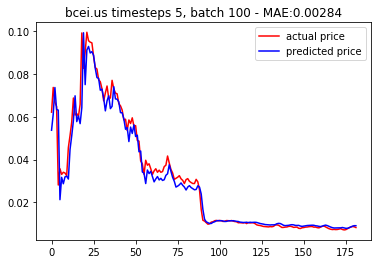

In [362]:
Deep_learning_plot(test_set, y_test, 'bcei.us timesteps 5, batch 100' +' - MAE:' + str(round(MAE[0],6)))